Лабораторная работа №2. Выполнил: Голубев Тимофей Дмитриевич. Группа: М8О-306Б-22

Подключаю библиотеки

In [97]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Читаю датасет

In [98]:
df = pd.read_csv('data/train.csv')
display(df)

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2010-06-26,27.0,66829.0,549.0,17290.0,60.0,Divorced,1.0,Rent,1095.0,...,Employed,Associate,4.0,35067.0,0.257790,0.251465,508.970230,0.288013,0.0,66.176500
1,1996-09-23,55.0,172147.0,850.0,16110.0,36.0,Widowed,1.0,Mortgage,211.0,...,Employed,High School,33.0,27001.0,0.086110,0.093173,514.675859,0.050585,1.0,28.495737
2,2015-01-19,51.0,300000.0,850.0,38436.0,36.0,Married,0.0,Mortgage,546.0,...,Employed,Bachelor,28.0,278382.0,0.108436,0.115443,1268.276385,0.072571,1.0,34.488104
3,1981-05-12,25.0,34683.0,847.0,19186.0,48.0,Married,0.0,Other,153.0,...,Employed,High School,0.0,9224.0,0.100686,0.112822,498.505187,0.225415,1.0,36.910753
4,1995-05-07,55.0,300000.0,850.0,30437.0,48.0,Single,2.0,Rent,562.0,...,Employed,Bachelor,31.0,4502.0,0.110437,0.089037,756.035156,0.052721,1.0,31.347091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11012,2010-07-10,57.0,300000.0,850.0,14756.0,48.0,Married,2.0,Own,620.0,...,Employed,Associate,38.0,167544.0,0.094756,0.106387,378.792448,0.039952,1.0,32.440586
11013,2003-10-22,28.0,15000.0,300.0,51361.0,96.0,Single,1.0,Own,696.0,...,Employed,Bachelor,5.0,116879.0,0.446361,0.401087,1793.042130,1.991234,0.0,67.673170
11014,1983-05-12,23.0,15000.0,302.0,30724.0,72.0,Married,3.0,Rent,413.0,...,Self-Employed,Associate,0.0,250778.0,0.404724,0.360670,1047.672294,1.168538,0.0,75.292707
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Информация о пропусках

In [99]:
display(df.isnull().sum())

ApplicationDate                530
Age                            530
AnnualIncome                   530
CreditScore                   1031
LoanAmount                    1031
LoanDuration                   530
MaritalStatus                  530
NumberOfDependents             530
HomeOwnershipStatus            530
MonthlyDebtPayments           1031
CreditCardUtilizationRate      530
NumberOfOpenCreditLines        530
NumberOfCreditInquiries        530
DebtToIncomeRatio              530
BankruptcyHistory             1031
LoanPurpose                   1031
PreviousLoanDefaults           530
PaymentHistory                 530
LengthOfCreditHistory          530
SavingsAccountBalance          530
CheckingAccountBalance        1031
TotalAssets                   1031
TotalLiabilities               530
MonthlyIncome                  530
UtilityBillsPaymentHistory     530
JobTenure                      530
EmploymentStatus               530
EducationLevel                 530
Experience          

Примеры строк с пропусками. Есть как полностью пустые строки, так и с 1-2 пропусками

In [100]:
display(df[df.isnull().any(axis=1)])

,ApplicationDate,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,HomeOwnershipStatus,MonthlyDebtPayments,...,EmploymentStatus,EducationLevel,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
13,1997-02-26,27.0,15000.0,NaN,NaN,48.0,Married,5.0,Other,NaN,...,Employed,High School,5.0,NaN,NaN,0.343139,1097.352250,1.293082,0.0,67.304719
17,2009-06-11,43.0,43876.0,NaN,NaN,24.0,Married,3.0,Mortgage,NaN,...,Employed,Associate,20.0,NaN,NaN,0.109708,1694.354520,0.657586,0.0,48.636125
25,1983-12-01,56.0,15000.0,NaN,NaN,12.0,Married,1.0,Own,NaN,...,Employed,Bachelor,34.0,NaN,NaN,0.218868,822.309410,1.221048,0.0,70.406884
80,2019-07-05,44.0,136297.0,NaN,NaN,36.0,Single,0.0,Rent,NaN,...,Employed,High School,24.0,NaN,NaN,0.208675,1526.095455,0.245736,1.0,37.218934
95,2011-03-06,23.0,203619.0,NaN,NaN,24.0,Divorced,0.0,Mortgage,NaN,...,Employed,Associate,0.0,NaN,NaN,0.124805,815.846517,0.098233,1.0,38.026142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10986,2016-01-09,36.0,15000.0,NaN,NaN,60.0,Married,0.0,Mortgage,NaN,...,Employed,High School,14.0,NaN,NaN,0.329262,1079.918129,1.612735,0.0,77.045945
11008,1983-05-18,37.0,300000.0,NaN,NaN,60.0,Married,3.0,Rent,NaN,...,Self-Employed,Master,12.0,NaN,NaN,0.294595,1948.292963,0.082572,1.0,42.571654
11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Категориальные признаки. Список всех категорий

In [101]:
print('MaritalStatus', df['MaritalStatus'].unique())
print('HomeOwnershipStatus', df['HomeOwnershipStatus'].unique())
print('EmploymentStatus', df['EmploymentStatus'].unique())
print('EducationLevel', df['EducationLevel'].unique())

MaritalStatus ['Divorced' 'Widowed' 'Married' 'Single' nan]
HomeOwnershipStatus ['Rent' 'Mortgage' 'Other' 'Own' nan]
EmploymentStatus ['Employed' 'Self-Employed' 'Unemployed' nan]
EducationLevel ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate' nan]


Удаляю все признаки

In [102]:
df = df.dropna()
display(df.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

In [103]:
# df = pd.get_dummies(df, columns=['MaritalStatus', 'HomeOwnershipStatus', 'EmploymentStatus', 'LoanPurpose', 'EducationLevel'])

Удаляю колонку с датой

In [104]:
df = df.drop(columns=['ApplicationDate'])

In [105]:
# columns_to_delete = set()
# for i in corr_matrix:
#     for j in corr_matrix:
#         if i != j and abs(corr_matrix[i][j]) >= 0.7:
#             columns_to_delete.add(j)
# columns_to_delete.add('MaritalStatus_Single')
# print(columns_to_delete)
# df_clear = df.drop(columns=columns_to_delete)
df_clear = df

Удаляю категориальные признаки. Можно было использовать one-hot encoding, но для эксперимента решил удалить

In [106]:
df_clear = df_clear.drop(columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel'])

Корреляционная матрица

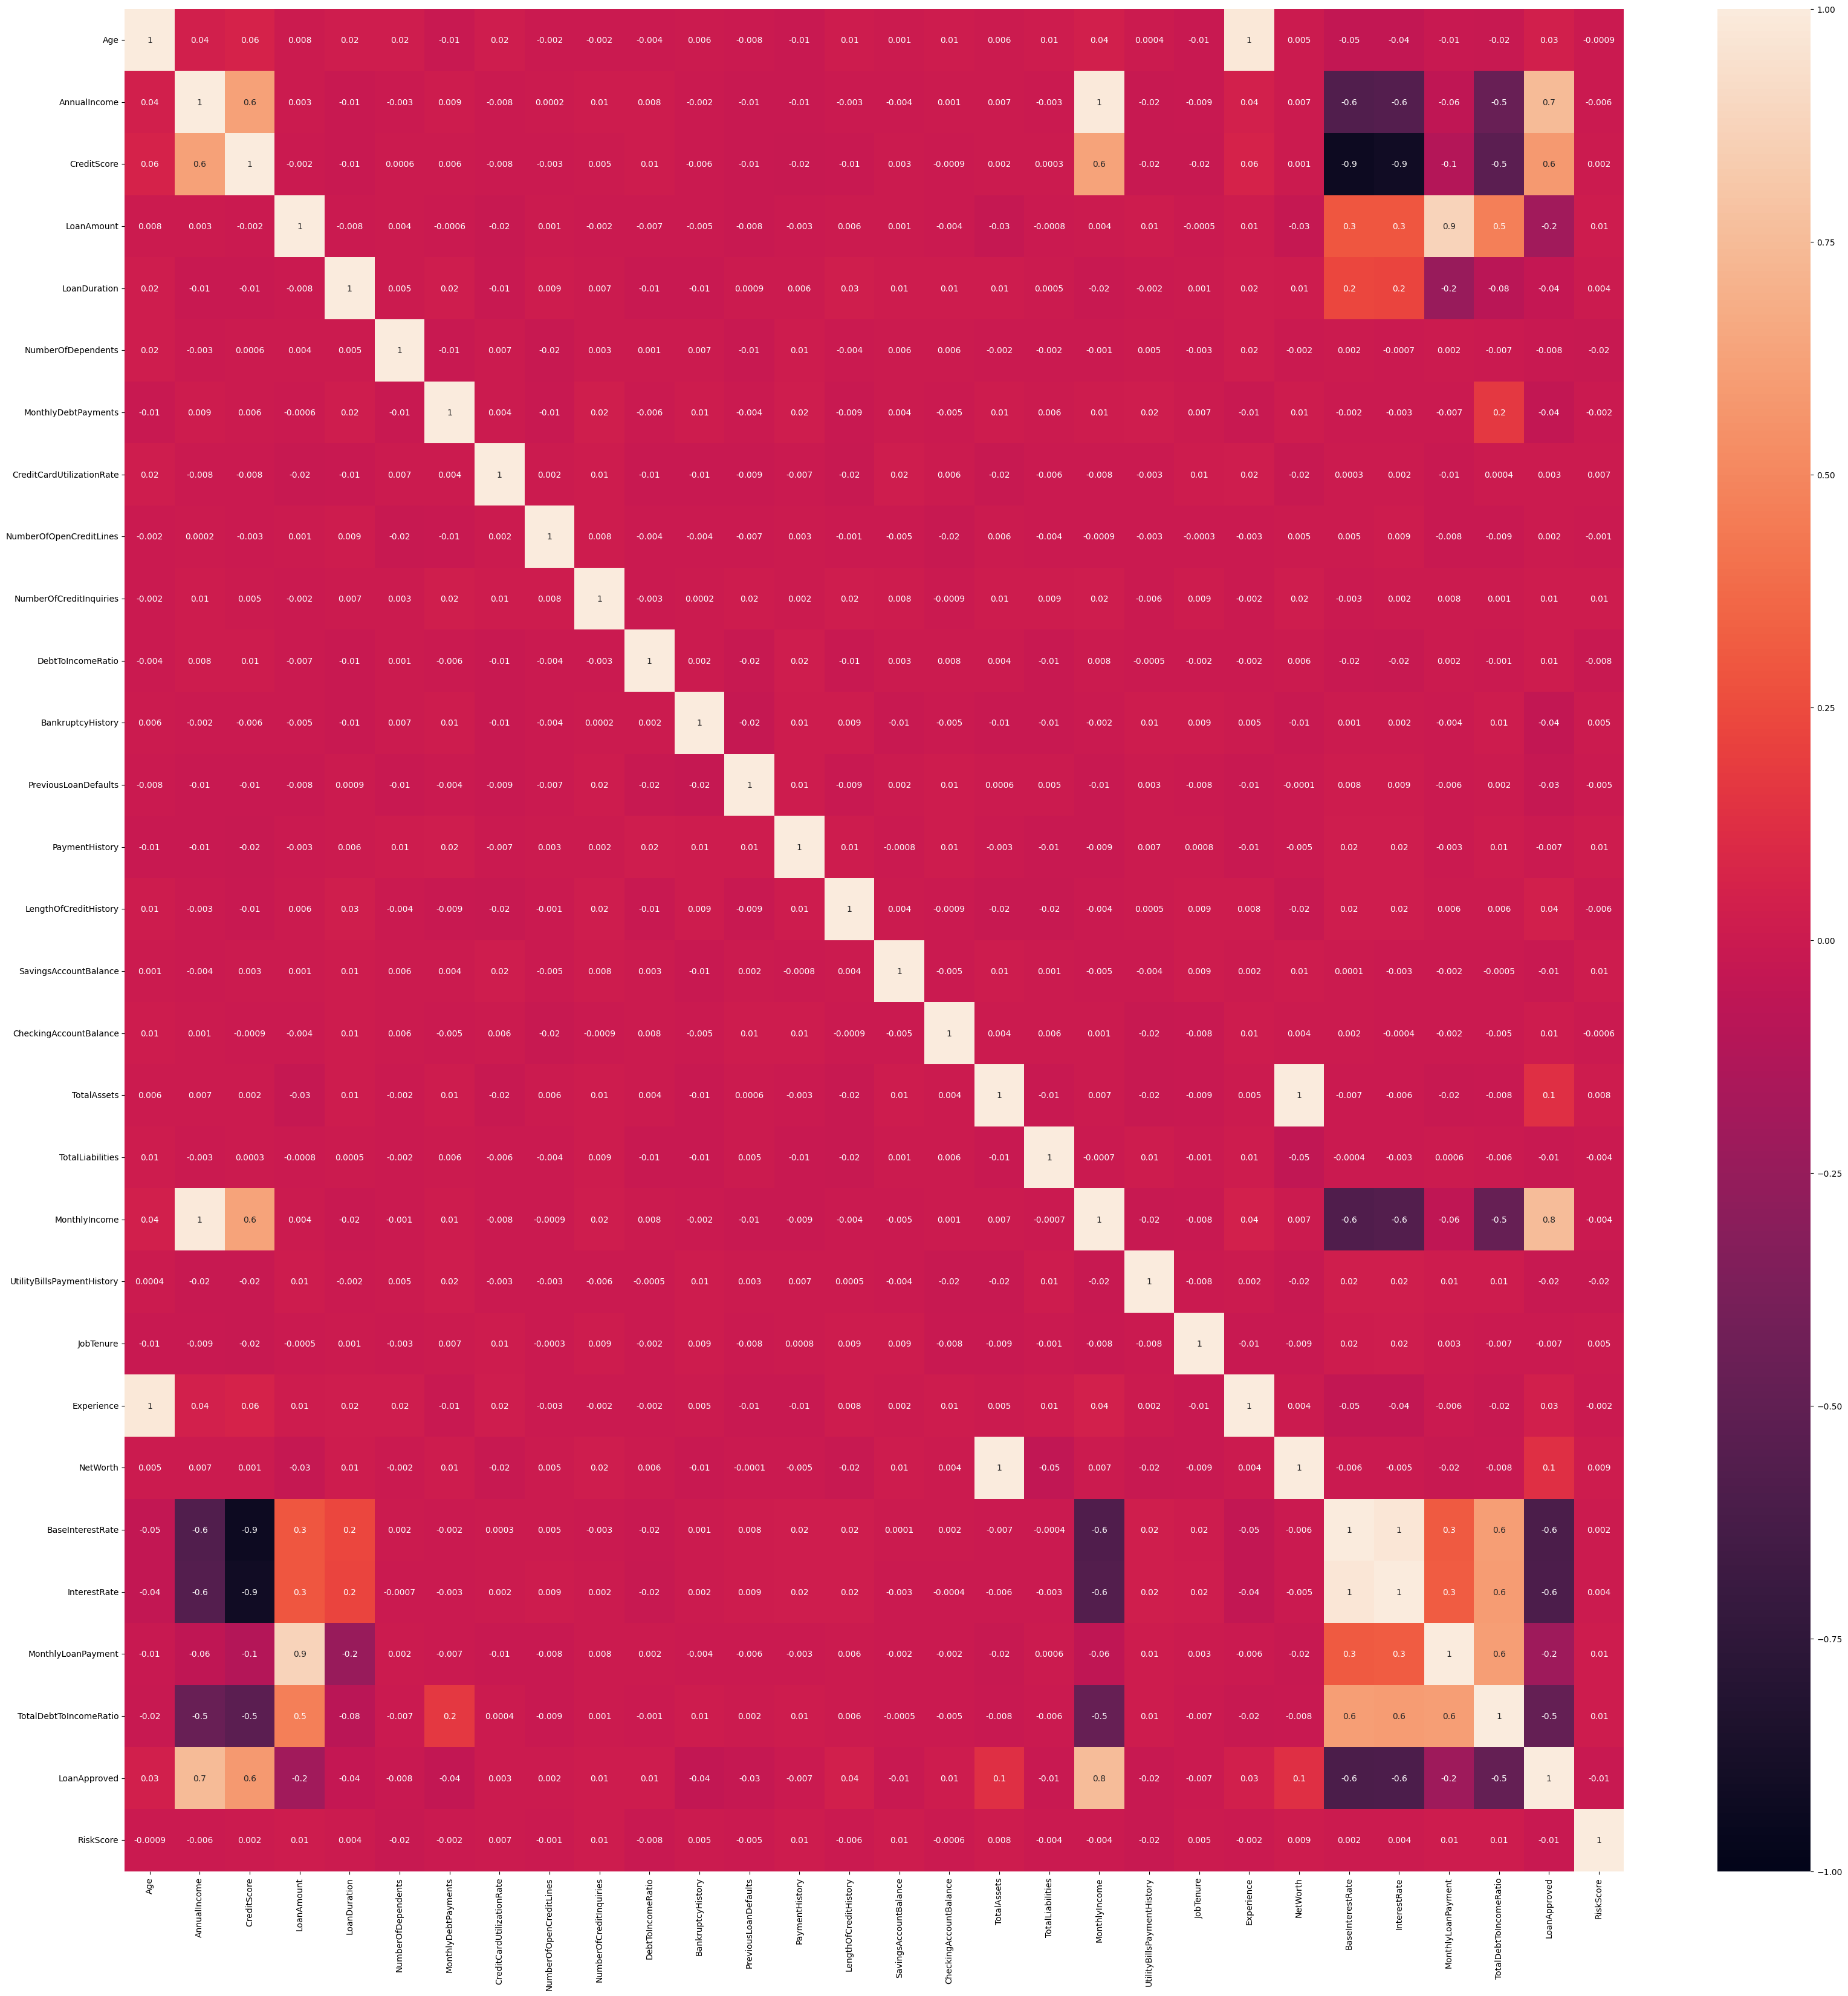

In [107]:
corr_matrix = df_clear.corr()
plt.figure(figsize=(40, 40))
sb.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, fmt = '.1g')
plt.show()

Удаляю выбросы в RiskScore. Нормализую датасет

In [108]:
df_clear = df_clear[(df_clear['RiskScore'] <= 100) & (df_clear['RiskScore'] >= 0)]
y = df_clear['RiskScore']
df_clear = df_clear.drop(columns=['RiskScore'])
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_clear), columns=df_clear.columns)
df_scaled

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,-1.111396,-0.557445,-0.735103,-0.454314,0.267948,-0.401500,1.091505,-0.831908,-0.591609,0.023615,...,-0.559931,1.006672,-0.426292,-1.206022,-0.256963,0.605869,0.531148,-0.421222,-0.257783,-1.024516
1,1.301172,0.349975,0.981315,-0.496743,-0.712207,-0.401500,-0.667440,-0.683564,-0.017083,-0.990062,...,0.373892,0.107508,-1.334557,1.352230,-0.274446,-1.209790,-1.107447,-0.417013,-0.521822,0.976070
2,0.956519,1.451557,0.981315,0.306021,-0.712207,-1.107480,-0.000871,0.999110,-0.017083,-0.990062,...,1.507527,1.068725,-0.880425,0.911152,0.270408,-0.973674,-0.876908,0.138898,-0.497372,0.976070
3,-1.283722,-0.834415,0.964208,-0.386141,-0.222130,-1.107480,-0.782846,-0.603726,2.281023,-0.990062,...,-0.844960,0.748372,-0.880425,-1.558884,-0.312976,-1.055636,-0.904049,-0.428942,-0.327397,0.976070
4,1.301172,1.451557,0.981315,0.018405,-0.222130,0.304480,0.030965,-0.071981,-0.017083,0.023615,...,1.507527,0.847829,0.027841,1.175799,-0.323211,-0.952511,-1.150258,-0.238969,-0.519447,0.976070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,0.611867,-0.369125,-0.170567,-0.879248,-1.692361,0.304480,-0.892282,-1.078043,2.855549,0.023615,...,-0.366131,-0.726397,-0.426292,0.470075,-0.069196,-0.465653,-0.364660,-0.429494,-0.488431,0.976070
9783,-0.077439,1.451557,0.981315,-0.798382,0.758025,2.422419,-0.538106,-0.436750,-0.591609,0.023615,...,1.507527,0.761191,-1.334557,-0.147435,-0.292639,-0.981235,-0.947792,-0.688675,-0.559287,0.976070
9784,1.473498,1.451557,0.981315,-0.545428,-0.222130,0.304480,0.146371,1.206459,-1.166135,2.050968,...,1.507527,0.017593,-0.426292,1.793308,0.030173,-1.118351,-0.970660,-0.517251,-0.533648,0.976070
9785,-1.025233,-1.004003,-2.154997,0.770758,1.738179,-0.401500,0.297592,0.235394,-0.591609,-0.990062,...,-1.019483,-0.371984,-0.880425,-1.117806,-0.079641,2.600165,2.079992,0.526003,1.636340,-1.024516


Обучаю модель

In [109]:
sk_reg = LinearRegression()
X = df_scaled
display(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.25)
sk_reg.fit(X_train, y_train)
y_pred = sk_reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
# y_pred = sk_reg.predict(X_train)
# print('MSE: ', mean_squared_error(y_train, y_pred))

0        66.176500
1        28.495737
2        34.488104
3        36.910753
4        31.347091
           ...    
11010    41.553066
11011    28.051757
11012    32.440586
11013    67.673170
11014    75.292707
Name: RiskScore, Length: 9787, dtype: float64

MSE:  20.154202572938882


Получаю предсказания и записываю в submission.csv

In [110]:
test_df = pd.read_csv('data/test.csv')
ans = pd.DataFrame(columns=['ID', 'RiskScore'])
# test_df = pd.get_dummies(test_df, columns=['MaritalStatus', 'HomeOwnershipStatus', 'EmploymentStatus', 'LoanPurpose', 'EducationLevel'])
ans['ID'] = test_df['ID']
test_df = test_df.drop(columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel', 'ApplicationDate', 'ID'])
# test_df = test_df.drop(columns=['ApplicationDate', 'ID'])

test_df_scaled = pd.DataFrame(scaler.fit_transform(test_df), columns=test_df.columns)
display(test_df_scaled)
ans['RiskScore'] = sk_reg.predict(test_df_scaled)
ans.to_csv('submission.csv', index=False)

display(ans)

,Age,AnnualIncome,CreditScore,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,NumberOfCreditInquiries,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,Experience,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,0.787875,0.638663,0.971893,-0.546054,0.267179,-1.071670,-0.336550,-1.300770,-0.556629,-0.998301,...,0.665486,0.801835,0.459492,0.478448,-0.345785,-1.005637,-0.765777,-0.535452,-0.510505,0.968108
1,-1.009910,-0.596647,-0.025652,1.190827,-0.222878,0.328657,-0.612864,-1.320560,0.589170,1.001902,...,-0.598856,0.064060,-0.890632,-1.271544,0.381564,0.341413,0.610032,0.762163,-0.073543,-1.032942
2,0.103005,1.444370,0.507128,-0.465971,0.267179,-0.371507,-0.150339,0.298636,1.162069,-0.998301,...,1.490128,0.176356,-0.890632,0.128449,-0.354983,-0.553050,-0.468442,-0.481443,-0.516557,0.968108
3,0.873484,1.444370,0.971893,0.620613,-0.712935,-1.071670,0.045884,1.639138,-0.556629,0.001800,...,1.490128,0.365987,-0.890632,0.740947,-0.351303,-0.856570,-1.026646,0.322696,-0.463079,0.968108
4,-0.410648,1.444370,-0.036987,0.728809,0.267179,3.129310,-0.877165,0.956348,-1.702428,-0.998301,...,1.490128,-0.395837,0.909534,-0.484048,0.727567,0.314531,0.377687,0.263987,-0.486155,0.968108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.017396,1.444370,0.971893,-0.606023,0.267179,-0.371507,-0.220418,-1.392589,1.162069,0.001800,...,1.490128,1.055349,-0.890632,0.128449,-0.344950,-1.024031,-1.080243,-0.576237,-0.523852,0.968108
4996,-0.068213,-0.506793,-0.603774,0.642497,-0.222878,-1.071670,-0.895185,-1.426408,-0.556629,0.001800,...,-0.506890,0.634481,-0.890632,-0.134049,-0.353450,0.705640,1.035522,0.469251,-0.235520,-1.032942
4997,0.274222,-1.027257,-1.272583,0.078546,0.757237,-0.371507,-0.510748,0.752251,-0.556629,-0.998301,...,-1.039585,-0.241855,0.459492,-0.046550,0.646120,1.357383,0.840036,-0.104318,0.494810,-1.032942
4998,1.130310,-0.303400,0.971893,-0.069980,1.737351,-0.371507,-0.662921,-0.921494,-1.129529,0.001800,...,-0.298716,1.457979,0.459492,1.090945,-0.358330,-0.546421,-0.377429,-0.392635,-0.457427,-1.032942


,ID,RiskScore
0,0,33.378338
1,1,57.919342
2,2,30.762059
3,3,32.253174
4,4,35.037343
...,...,...
4995,4995,32.178104
4996,4996,60.433434
4997,4997,63.845233
4998,4998,50.235094
